### First add the data functions to the path

In [12]:
import sys
import numpy as np
import pandas as pd
import xarray as xr
import copy
import gsw
import seaborn as sns
from netCDF4 import Dataset
from pathlib import Path
from datetime import datetime, timedelta
notebook_dir = !pwd # Replace with !echo %cd% if using windows
library_dir = Path(notebook_dir[0]).parent.absolute()
sys.path.append(str(library_dir))
data_raw_path = library_dir / 'data' / 'raw' / 'adcp'
glider_raw_path = Path('/media/callum/storage/Documents/Eureka/data/glider/sg637')
fig_path = library_dir / 'reports' / 'figures'
from src.data.adcp_mission_analysis import adcp_import_data, add_dive_averages, read_glider_nc, edgetocentre

In [13]:
def savefig(figname, extension="png"):
    plt.savefig(
        fig_path / str(figname + "." + extension),
        format=extension,
        dpi="figure",
        bbox_inches="tight",
    )

Use better plotting defaults

In [14]:
import matplotlib.pyplot as plt
from matplotlib import style
style_path = library_dir / 'src' / 'visualization' / 'presentation.mplstyle'
style.use(str(style_path))

### Load the data into Python

In [15]:
overview, mission_dict = adcp_import_data(data_raw_path, incorrect_beams=True)


311it [07:29,  1.45s/it]


Add beam attributes. These are taken from the fifth cell (11.3 m from the glider on default settings) and averaged over each ascent/descent profile

In [16]:
beam_attrs, adcp_df = add_dive_averages(overview, mission_dict)
beam_attrs
# overview.join(beam_attrs)

/media/callum/storage/Documents/adcp-glider/src/data/adcp_mission_analysis.py:427: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beam_attrs["dive_num"][beam_attrs.index.str[-1] == "b"] += 0.5


,cor_beam_1,cor_beam_2,cor_beam_3,cor_beam_4,amp_beam_1,amp_beam_2,amp_beam_3,amp_beam_4,beam_miss,pitch,roll,heading,good_angle_5,good_angle_all,good_cor_5,good_cor_all,dive_num
0000a,NaN,3.266667,3.000000,3.400000,NaN,27.466667,27.100000,27.200000,3.095026,-46.674664,4.855333,127.181343,0.000000,0.000000,0.000000,0.000000,0.0
0001a,NaN,20.106383,16.425532,17.212766,NaN,29.670213,29.042553,29.351064,2.697399,-42.630852,4.440851,235.983398,6.382979,6.382979,16.879433,13.049645,1.0
0001b,46.821429,48.857143,NaN,46.321429,33.696429,33.294643,NaN,32.857143,1.875847,-12.929286,4.590000,184.708572,32.142857,5.357143,47.857143,36.428571,1.5
0002a,NaN,63.545455,62.800000,62.709091,NaN,34.881818,34.563636,34.345455,1.607731,-29.559093,5.614909,115.971268,40.000000,38.181818,66.545455,48.404040,2.0
0002b,88.183333,87.666667,NaN,86.350000,37.816667,37.258333,NaN,36.741667,0.898507,16.158834,5.542000,134.029495,60.000000,48.333333,92.555556,66.777778,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0153b,96.581395,96.069767,NaN,95.697674,42.767442,42.116279,NaN,41.523256,0.777380,25.423719,2.500698,106.601860,83.720930,0.000000,99.379845,84.702842,153.5
0154a,NaN,92.705882,93.235294,94.705882,NaN,39.029412,40.470588,39.705882,1.549429,-26.010000,3.985883,35.480000,47.058824,5.882353,99.215686,74.248366,154.0
0154b,95.785714,95.142857,NaN,95.142857,41.714286,41.000000,NaN,40.642857,0.983536,24.104288,4.052857,97.740715,64.285714,0.000000,99.523810,82.222222,154.5
0155a,NaN,93.888889,91.925926,93.592593,NaN,39.648148,40.092593,39.000000,1.377177,-26.317038,4.590370,180.342194,33.333333,0.000000,99.506173,76.131687,155.0


In [10]:
adcp_df.head()

,cast_num,pressure_ad,pitch_ad,roll_ad,heading_ad,u,v,w,u_prime,v_prime,w_prime
2020-01-26 04:35:12.438199,0020a,1.408000,-59.719997,2.200000,44.459999,0.009537,-0.173916,0.084425,0.179413,-0.067177,0.027632
2020-01-26 04:35:27.438500,0020a,1.529000,-64.970001,0.600000,53.669998,-0.027878,-0.041409,0.043592,0.047120,-0.017314,0.043267
2020-01-26 04:36:37.438500,0020a,2.199000,-26.830000,1.030000,25.430000,0.002134,-0.102930,0.012691,0.096388,-0.037379,0.008510
2020-01-26 04:37:47.438500,0020a,14.804001,-26.029999,11.950000,13.620000,-0.454049,0.004732,-0.001104,-0.060791,-0.405566,0.194947
2020-01-26 04:38:57.438500,0020a,29.311001,-26.099998,8.929999,325.459991,-0.447267,-0.007099,-0.001104,0.258818,-0.310051,0.192304


In [ ]:
adcp_df

Check that the data start when you expect. The first file in particular may have data from a previous sim dive or bench test. adapt the following cell to select the data starting on the correct day

In [ ]:
# For this dataset, need to remove the data before 23 Jan, they are from 2019 benchtests and 2020 sim dives
adcp_df = adcp_df['2020-01-23':]

### Per profile averages

Good_var_5 is var averaged over closest 5 bins. Good_var_all averages over all bins. Good angle is defined as within 1 m beam miss. Good correlation is > 50 %

In [ ]:
beam_attrs.plot(subplots=True,figsize=(20,40),marker='o');
savefig('beam_attributes')

### Plot some key QC parameters from each dive limb

In [ ]:
def plot_mission_qc(beam_attrs):
    fig, ax = plt.subplots(5,1, sharex=True, figsize=(14,15))
    ax = ax.ravel()
    ax[0].scatter(beam_attrs.dive_num, beam_attrs.cor_beam_1, label='correlation (%)')
    ax[1].scatter(beam_attrs.dive_num, beam_attrs.amp_beam_1, label='return amp (dB)')
    ax[2].scatter(beam_attrs.dive_num, np.abs(beam_attrs.pitch), label='|pitch|')
    ax[3].scatter(beam_attrs.dive_num, beam_attrs.roll, label='|roll|')
    ax[3].set(ylim = [0,15])
    ax[4].scatter(beam_attrs.dive_num, beam_attrs.beam_miss, label='Beam miss (m)')
    ax[4].set(ylim = [0,2])
    for axi in ax:
        axi.legend()
    return fig, ax

In [ ]:
fig, ax = plot_mission_qc(beam_attrs)
savefig('beam_attrs_short')

See which variables are correlated between the dive limbs

In [ ]:
attr_corr = beam_attrs.corr()
mask = np.triu(np.ones_like(attr_corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 22))
sns.heatmap(attr_corr, cmap='RdBu_r', vmin=-1,vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Load in glider attitude data for comparison with that from the ADCP

In [ ]:
glider_df = read_glider_nc(glider_raw_path / 'sg637_var_by_var_timeseries.nc')
glider_df

Here we import the DAC and surface drift calculated from the glider base station. They appear to be better.

In [ ]:
def basestation_dac_drift(glider_df, path_to_ncs):
    """ Extracts surface drift and dive average current from Seaglider basestation dive netcdfs
    Adds these to a glider dataframe
    Takes a glider dataframe as an input
    Pass it a path to a directory containing files of pattern pNNNxxxx.nc 
    where NNN is Seaglider number, xxxx is dive number
    Returns a dataframe indexed by dive number, with surface drift and DACs in m/s"""
    files_path = path_to_ncs.rglob("p???????.nc")
    files_list = []
    for path in files_path:
        files_list.append(str(path))
    if len(files_list) == 0:
        print("Did not find any netcdf files of pattern pNNNxxxx.nc. Aborting")
        return "That path didn't have what I needed bud"
    files = np.sort(files_list)
    df = pd.DataFrame()
    for file_name in files:
        ds = xr.open_dataset(file_name)
        dive_no = int(ds.dive_number)
        dac_u = ds.depth_avg_curr_east.values.flatten()[0]
        dac_v = ds.depth_avg_curr_north.values.flatten()[0]
        drift_u = ds.surface_curr_east.values.flatten()[0]/100
        drift_v = ds.surface_curr_north.values.flatten()[0]/100
        line = {"dive_no":dive_no, "DAC_u_bs":dac_u, "DAC_v_bs":dac_v, "drift_u_bs":drift_u,  "drift_v_bs":drift_v}
        df = df.append(line, ignore_index=True)
    df.index = df.dive_no    
    df = df.drop("dive_no", axis=1)
    df_merge = pd.merge(glider_df, df, left_on="dive_num", right_on="dive_no", how="left", validate="m:1")
    return df_merge
glider_df = basestation_dac_drift(glider_df,Path('/media/callum/storage/Documents/foo/ego_glider_nc/data_from_basestaion'))
glider_df.index = glider_df.glider_time

Plot of pressure over time from the glider and AD2CP. Adjust limits to fit your data. A close fit shows that the clocks are synced well and the pressure sensors agree. If the blue and orange lines are not co-incident, you have an issue

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(glider_df.index, glider_df.pressure, label='glider', s=1)
ax.scatter(adcp_df.index, adcp_df.pressure_ad, label='adcp', s=1)
ax.set(xlim=[datetime(2020,1,24,0), datetime(2020,1,24,12)],ylim = [-10,750], ylabel='Pressure (dbar)')
ax.legend()
savefig('pressure_glider_vs_adcp')

### Attitude comparison. A mismatch may indicate physcal misalignment of the glider and ADCP or a poor calibration of the accelerometers in either unit.

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(20,26), sharex=True)
ax = ax.ravel()
ax[0].scatter(glider_df.index, glider_df.pitch, label='glider')
ax[0].scatter(adcp_df.index, adcp_df.pitch_ad, label='adcp')
ax[0].set(xlim=[datetime(2020,1,24,0), datetime(2020,1,24,12)], ylim=[-30,30], ylabel='Pitch')
ax[1].scatter(glider_df.index, glider_df.roll)
ax[1].scatter(adcp_df.index, adcp_df.roll_ad)
ax[1].set(ylim=[-20,20], ylabel='Roll')
ax[2].scatter(glider_df.index, glider_df.heading)
ax[2].scatter(adcp_df.index, adcp_df.heading_ad)
ax[2].set(ylim=[50,200], ylabel='Heading')
ax[0].legend();
savefig('attitude_glider_vs_adcp')

### Merge the two dataframes on nearest datetime to directly compare

In [ ]:
adcp_df['adcp_time'] = adcp_df.index
g_df = glider_df.drop('glider_time', axis=1)

In [ ]:
# Setting a tolerance of 2 seconds to be considered coincident
df_merged = pd.merge_asof(adcp_df, g_df, left_on="adcp_time", right_on="glider_time",
              direction="nearest", tolerance=pd.Timedelta(seconds=2))

In [ ]:
df_merged

### Seaborn linear regressions of attitude

In [ ]:
import seaborn as sns

In [ ]:
g = sns.lmplot(x='pitch_ad', y='pitch', data=df_merged,x_ci='sd', scatter_kws={"s": 10})
g.set(ylim=(-30, 30), xlim=(-30, 30), xlabel='AD2CP', ylabel='Glider', title='Pitch')
savefig('Pitch_correlation')

In [ ]:
g = sns.lmplot(x='roll_ad', y='roll', data=df_merged,x_ci='sd', scatter_kws={"s": 10})
g.set(ylim=(-20, 20), xlim=(-20, 20),  xlabel='AD2CP', ylabel='Glider', title='Roll')
savefig('Roll_correlation')

In [ ]:
g = sns.lmplot(x='heading_ad', y='heading', data=df_merged,x_ci='sd', scatter_kws={"s": 10})
g.set(ylim=(0,360), xlim=(0, 360),  xlabel='AD2CP', ylabel='Glider', title='Heading')
savefig('Heading_correlation')

In [ ]:
glider_av_df = glider_df.groupby('dive', as_index=False).mean()
glider_av_df

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(16,14), sharex=True)
ax = ax.ravel()
ax[0].scatter(glider_av_df.dive_num, glider_av_df.DAC_u)
ax[1].scatter(glider_av_df.dive_num, glider_av_df.DAC_v)
ax[0].set(ylabel='DAC u $(\mathrm{m\ s^{-1}})$', ylim=[-0.2, 0.2])
ax[1].set(ylabel='DAC v $(\mathrm{m\ s^{-1}})$', xlabel='Dive number', ylim=[-0.2, 0.2])
savefig('DAC_by_dive')

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(16,14), sharex=True)
ax = ax.ravel()
ax[0].scatter(glider_av_df.heading, glider_av_df.DAC_u)
ax[1].scatter(glider_av_df.heading, glider_av_df.DAC_v)
ax[0].set(ylabel='DAC u $(\mathrm{m\ s^{-1}})$', ylim=[-0.2, 0.2])
ax[1].set(ylabel='DAC v $(\mathrm{m\ s^{-1}})$', xlabel='Mean heading', ylim=[-0.2, 0.2], xlim=[0,360])
savefig('DAC_by_heading')

In [ ]:
dive = mission_dict['0061a']
flagger = copy.deepcopy(dive.flag_bad_data)
for cell in range(np.size(flagger,1)):
    flagger[:,cell,:] = flagger[:,3,:]
dive_vel = copy.deepcopy(dive.vel_xyz)
dive_vel[:,1,0][:-1]

In [ ]:
sub_df = asc_df[asc_df.dive_no== 41.0]
sub_df.describe()asc_df.corr()

In [19]:
def edge_to_centre(x_in):
    x_out = np.array(x_in)
    return np.nanmean([x_out[1:], x_out[:-1]], axis=0)


def centre_to_edge(x_in):
    x_out = np.array(np.empty(len(x_in) + 1))
    x_out[:-1] = x_in - (x_in[1] - x_in[0]) / 2
    x_out[-1] = x_in[-1] + (x_in[1] - x_in[0]) / 2
    return x_out

In [22]:
mission_lat = 13
glider_z = gsw.z_from_p(adcp_df.pressure_ad, mission_lat)
dz = glider_z[1:] - glider_z[:-1]
dt_datetime = adcp_df.index[1:] - adcp_df.index[:-1]
dt_sec = []
for timepoint in dt_datetime:
    dt_sec.append(timepoint.seconds)
glider_w_from_p = dz / dt_sec
glider_w_points = centre_to_edge(glider_w_from_p)

In [23]:
adcp_df['w_from_p'] = glider_w_points

In [24]:
adcp_df.head()

,cast_num,pressure_ad,pitch_ad,roll_ad,heading_ad,u,v,w,u_prime,v_prime,w_prime,w_from_p
2019-11-27 11:46:45.063199,0000a,1.872,-58.609997,-2.31,279.559998,-1.440961,-0.010648,-0.130777,0.844191,-0.178882,1.161433,-0.026347
2019-11-27 11:46:46.063199,0000a,1.894,-58.590000,-2.34,279.649994,-1.225690,0.222423,0.033108,0.557353,-0.364235,1.053364,-0.017399
2019-11-27 11:46:47.063199,0000a,1.907,-58.590000,-2.34,278.329987,-0.903536,-0.576170,0.614153,0.024240,0.533250,1.113817,-0.004522
2020-01-19 13:37:16.063199,0000a,2.228,-43.169998,-6.47,89.809998,-0.260120,-0.133690,1.263070,0.674463,-0.006746,1.107220,0.064128
2020-01-19 13:37:17.063300,0000a,2.159,-42.419998,-5.19,88.759995,-0.071272,-0.384508,-0.203614,-0.181433,-0.396198,-0.067033,-0.081030


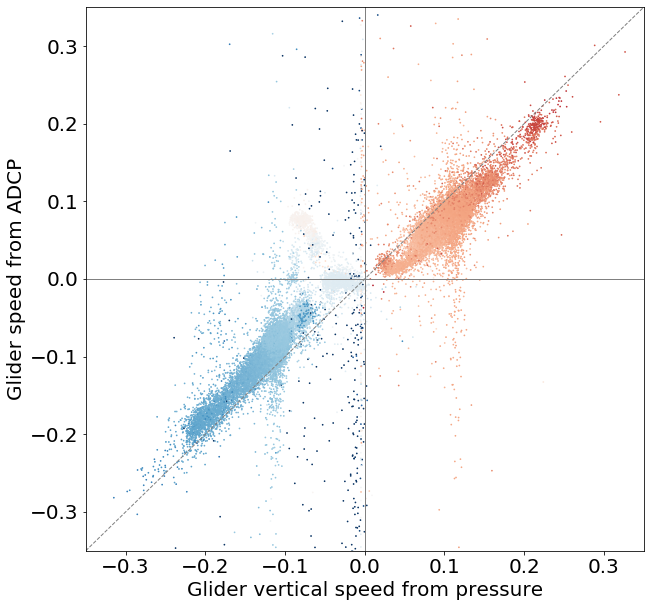

In [45]:
lim=0.35
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter( adcp_df.w_from_p,-adcp_df.w_prime, s=0.5, c=adcp_df.pitch_ad, cmap='RdBu_r', vmin=-50,vmax=50)
ax.set(xlabel='Glider vertical speed from pressure', ylabel='Glider speed from ADCP', xlim=[-lim,lim], ylim=[-lim,lim])
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')

ax.plot([-lim, lim], [-lim, lim],linestyle='--', color='grey', label='1:1 slope')

In [49]:
theoretical_u =adcp_df.w_from_p / np.sin(np.deg2rad(adcp_df.pitch_ad))

/home/callum/anaconda3/envs/adcp-glider/lib/python3.7/site-packages/matplotlib/mathtext.py:2542: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


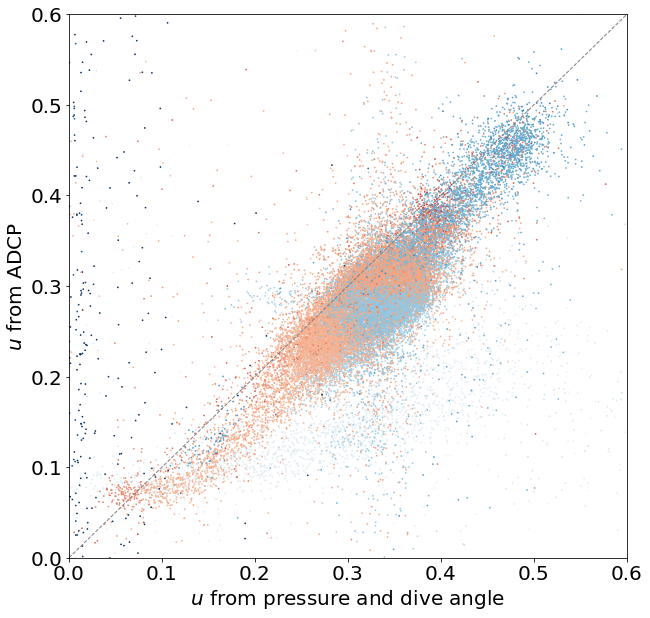

In [58]:
lim=0.6
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter( theoretical_u,-adcp_df.u, s=0.5, c=adcp_df.pitch_ad, cmap='RdBu_r', vmin=-50,vmax=50)
ax.set(xlabel="$u$ from pressure and dive angle", ylabel="$u$ from ADCP", xlim=[0,lim], ylim=[0,lim])
ax.plot([0, lim], [0, lim],linestyle='--', color='grey', label='1:1 slope')

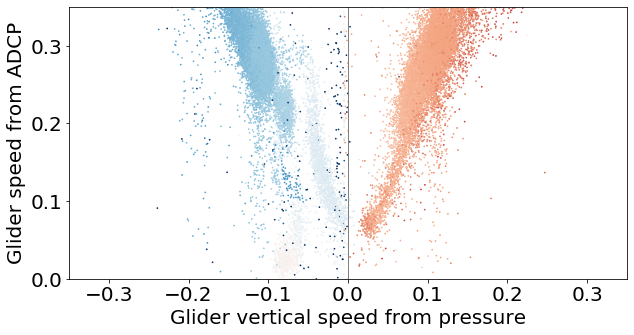

In [47]:
lim=0.35
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter( adcp_df.w_from_p,-adcp_df.u, s=0.5, c=adcp_df.pitch_ad, cmap='RdBu_r', vmin=-50,vmax=50)
ax.set(xlabel='Glider vertical speed from pressure', ylabel='Glider speed from ADCP', xlim=[-lim,lim], ylim=[0,lim])
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')

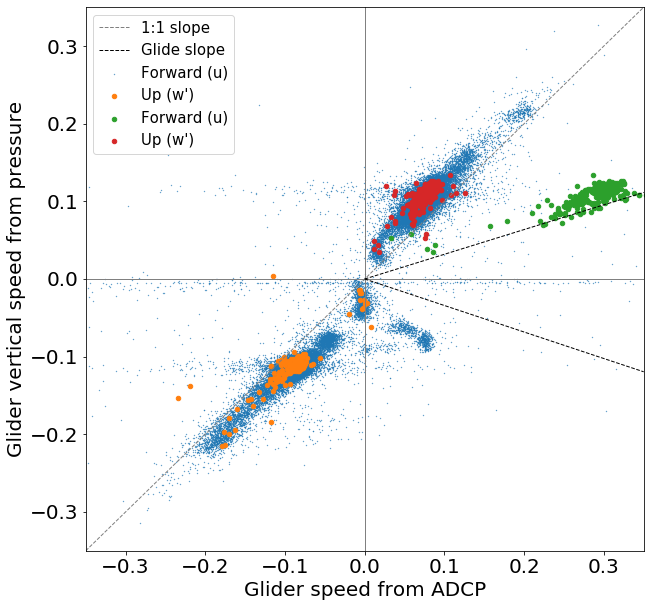

In [37]:
lim=0.35
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(-adcp_df.w_prime, adcp_df.w_from_p, s=0.1, label='Forward (u)')
ax.scatter(-edge_to_centre(des_df.vel_enu[:,0,2]), des_df.glider_w_from_p, s = 20, label="Up (w')")
ax.scatter(-edge_to_centre(asc_df.vel_xyz[:,0,0]), asc_df.glider_w_from_p, s = 20, label='Forward (u)')
ax.scatter(-edge_to_centre(asc_df.vel_enu[:,0,2]), asc_df.glider_w_from_p, s = 20, label="Up (w')")
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')

ax.plot([-lim, lim], [-lim, lim],linestyle='--', color='grey', label='1:1 slope')
ax.plot([0, lim], [0, lim*np.sin(np.deg2rad(np.nanmean(asc_df.pitch)))],linestyle='--', color='k', label='Glide slope')
ax.plot([ 0, lim], [0, lim*np.sin(np.deg2rad(np.nanmean(des_df.pitch)))],linestyle='--', color='k')

ax.set(ylabel='Glider vertical speed from pressure', xlabel='Glider speed from ADCP', xlim=[-lim,lim], ylim=[-lim,lim])
ax.legend()
#savefig('ADCP_derived_velocity')

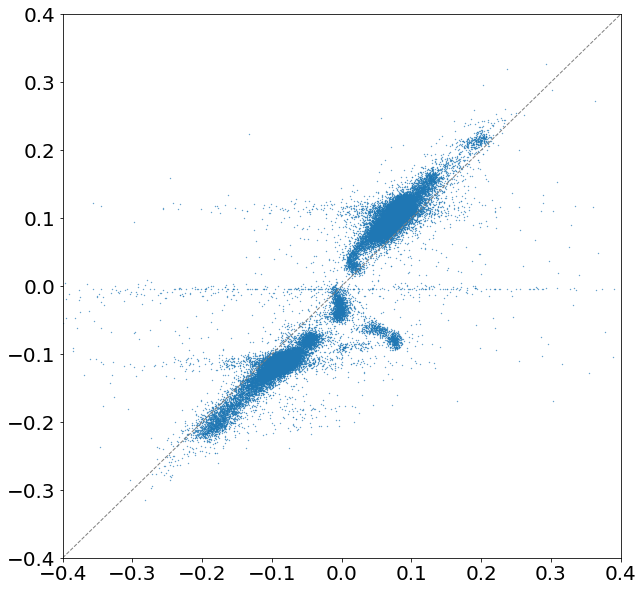

In [33]:
lim=0.4
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(-adcp_df.w_prime, adcp_df.w_from_p, s=0.1)
ax.set(xlim=[-lim, lim], ylim=[-lim,lim])
ax.plot([-lim, lim], [-lim, lim],linestyle='--', color='grey', label='1:1 slope')


In [36]:
des_df = mission_dict['0065a']
asc_df = mission_dict['0065b']

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,10), sharey=True)
ax = ax.ravel()
ax[0].scatter(-edge_to_centre(des_df.vel_xyz[:,1,0]), des_df.glider_w_from_p, s = 20, label='Forward (u)')
ax[0].scatter(-edge_to_centre(des_df.vel_xyz[:,1,1]), des_df.glider_w_from_p, s = 20, label='Cross glider (v)')
ax[0].scatter(-edge_to_centre(des_df.vel_xyz[:,1,2]), des_df.glider_w_from_p, s = 20, label='Glider up (w)')

ax[1].scatter(-edge_to_centre(des_df.vel_enu[:,1,0]), des_df.glider_w_from_p, s = 20, label="East (u')")
ax[1].scatter(-edge_to_centre(des_df.vel_enu[:,1,1]), des_df.glider_w_from_p, s = 20, label="North glider (v')")
ax[1].scatter(-edge_to_centre(des_df.vel_enu[:,1,2]), des_df.glider_w_from_p, s = 20, label="Up (w')")

In [ ]:
lim=0.35
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(-edge_to_centre(des_df.vel_xyz[:,0,0]), des_df.glider_w_from_p, s = 20, label='Forward (u)')
ax.scatter(-edge_to_centre(des_df.vel_enu[:,0,2]), des_df.glider_w_from_p, s = 20, label="Up (w')")
ax.scatter(-edge_to_centre(asc_df.vel_xyz[:,0,0]), asc_df.glider_w_from_p, s = 20, label='Forward (u)')
ax.scatter(-edge_to_centre(asc_df.vel_enu[:,0,2]), asc_df.glider_w_from_p, s = 20, label="Up (w')")
ax.axhline(0, color='gray')
ax.axvline(0, color='gray')

ax.plot([-lim, lim], [-lim, lim],linestyle='--', color='grey', label='1:1 slope')
ax.plot([0, lim], [0, lim*np.sin(np.deg2rad(np.nanmean(asc_df.pitch)))],linestyle='--', color='k', label='Glide slope')
ax.plot([ 0, lim], [0, lim*np.sin(np.deg2rad(np.nanmean(des_df.pitch)))],linestyle='--', color='k')

ax.set(ylabel='Glider vertical speed from pressure', xlabel='Glider speed from ADCP', xlim=[-lim,lim], ylim=[-lim,lim])
ax.legend()
savefig('ADCP_derived_velocity')

In [ ]:
g = sns.jointplot(des_df.u, des_df.w_from_p, height=12, space=0, xlim=(-0.6, 0.0), ylim=(-0.3, -0.04))
savefig('seaborn_den_scat')

In [ ]:
g = sns.jointplot(asc_df.u, asc_df.w_from_p, kind="kde", height=12, space=0, xlim=(-1, 0.2), ylim=(0.06, 0.14))

In [ ]:
asc_df.corr()

Plot the xyz velocites from one dive cycle. Upper panel dive, lower panel climb

In [ ]:
foo = mission_dict['0061a']
bar = mission_dict['0061b']

Plot velocities beam by beam

In [ ]:
v_lim = 0.3
fig,ax = plt.subplots(3,2,figsize=(15,15), sharex='col', sharey='row')
ax = ax.ravel()
ax[0].scatter(foo.time,foo.vel_beam[:,0,0])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[1].scatter(bar.time,bar.vel_beam[:,0,0])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[2].scatter(foo.time,foo.vel_beam[:,0,1])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[3].scatter(bar.time,bar.vel_beam[:,0,1])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[4].scatter(foo.time,foo.vel_beam[:,0,2])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[5].scatter(bar.time,bar.vel_beam[:,0,2])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)

ax[0].set(ylim=[-v_lim, v_lim])
ax[2].set(ylim=[-v_lim, v_lim], ylabel='Beam velocity bin 1 (m/s)')
ax[4].set(xlim=[foo.time[0], foo.time[-1]], ylim=[-v_lim, v_lim])
ax[5].set(xlim=[bar.time[0], bar.time[-1]])

ax[0].text(0.6, 0.8, 'Descent beam 1',transform=ax[0].transAxes)
ax[1].text(0.6, 0.8, 'Ascent beam 1',transform=ax[1].transAxes)
ax[2].text(0.6, 0.5, 'Descent beam 2',transform=ax[2].transAxes)
ax[3].text(0.6, 0.8, 'Ascent beam 2',transform=ax[3].transAxes)
ax[4].text(0.6, 0.8, 'Descent beam 3',transform=ax[4].transAxes)
ax[5].text(0.6, 0.8, 'Ascent beam 3',transform=ax[5].transAxes)
fig.autofmt_xdate()
#savefig('beam_velocities')

In [ ]:
v_lim = 0.3
fig,ax = plt.subplots(3,2,figsize=(15,15), sharex='col', sharey='row')
ax = ax.ravel()
ax[0].scatter(foo.time,foo.vel_xyz[:,0,0])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[1].scatter(bar.time,bar.vel_xyz[:,0,0])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[2].scatter(foo.time,foo.vel_xyz[:,0,1])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[3].scatter(bar.time,bar.vel_xyz[:,0,1])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[4].scatter(foo.time,foo.vel_xyz[:,0,2])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[5].scatter(bar.time,bar.vel_xyz[:,0,2])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)

ax[0].set(ylim=[-v_lim, v_lim])
ax[2].set(ylim=[-v_lim, v_lim], ylabel='Beam velocity bin 1 (m/s)')
ax[4].set(xlim=[foo.time[0], foo.time[-1]], ylim=[-v_lim, v_lim])
ax[5].set(xlim=[bar.time[0], bar.time[-1]])

ax[0].text(0.6, 0.8, 'Descent along glider',transform=ax[0].transAxes)
ax[1].text(0.6, 0.8, 'Ascent along glider',transform=ax[1].transAxes)
ax[2].text(0.6, 0.5, 'Descent across glider',transform=ax[2].transAxes)
ax[3].text(0.6, 0.8, 'Ascent across glider',transform=ax[3].transAxes)
ax[4].text(0.6, 0.8, 'Descent glider up',transform=ax[4].transAxes)
ax[5].text(0.6, 0.8, 'Ascent glider up' , transform=ax[5].transAxes)
fig.autofmt_xdate()

In [ ]:
v_lim = 0.3
fig,ax = plt.subplots(3,2,figsize=(15,15), sharex='col', sharey='row')
ax = ax.ravel()
ax[0].scatter(foo.time,foo.vel_enu[:,0,0])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[1].scatter(bar.time,bar.vel_enu[:,0,0])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[2].scatter(foo.time,foo.vel_enu[:,0,1])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[3].scatter(bar.time,bar.vel_enu[:,0,1])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[4].scatter(foo.time,foo.vel_enu[:,0,2])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[5].scatter(bar.time,bar.vel_enu[:,0,2])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)

ax[0].set(ylim=[-v_lim, v_lim])
ax[2].set(ylim=[-v_lim, v_lim], ylabel='Beam velocity bin 1 (m/s)')
ax[4].set(xlim=[foo.time[0], foo.time[-1]], ylim=[-v_lim, v_lim])
ax[5].set(xlim=[bar.time[0], bar.time[-1]])

ax[0].text(0.6, 0.8, 'Descent beam 1',transform=ax[0].transAxes)
ax[1].text(0.6, 0.8, 'Ascent beam 1',transform=ax[1].transAxes)
ax[2].text(0.6, 0.5, 'Descent beam 2',transform=ax[2].transAxes)
ax[3].text(0.6, 0.8, 'Ascent beam 2',transform=ax[3].transAxes)
ax[4].text(0.6, 0.8, 'Descent beam 3',transform=ax[4].transAxes)
ax[5].text(0.6, 0.8, 'Ascent beam 3',transform=ax[5].transAxes)
fig.autofmt_xdate()

In [ ]:
sub_df = asc_df[asc_df.dive_no== 41.0]
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(sub_df.w_from_p, sub_df.u)
#ax.set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5])

In [ ]:
sub_df

In [ ]:
dive = mission_dict['0041a']
flagger = copy.deepcopy(dive.flag_bad_data)
for cell in range(np.size(flagger,1)):
    flagger[:,cell,:] = flagger[:,3,:]
dive_vel = copy.deepcopy(dive.vel_xyz)
dive_vel[:,1,0][:-1]

In [ ]:
np.round(edgetocentre(foo.vel_xyz[:,1,0]) - des_df.u.values,2)

In [ ]:
des_df.u

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,14), sharex=False)
ax = ax.ravel()
ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,1,0][:-1], label='x')
ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,1,1][:-1], label='y')
#ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,1,2][:-1], label='z')
ax[0].set(xlim=[0,0.2], ylim=[-0.4,0.4],ylabel='xyz water velocity from ADCP m/s')
ax[0].legend()
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,1,0][:-1], label='x')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,1,1][:-1], label='y')
#ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,1,2][:-1], label='z')
ax[1].set(xlim=[-0.25,0.], ylim=[-0.4,0.4], xlabel='w from pressure m/s')
#savefig('xyz_vel_dive41')

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,14), sharex=False)
ax = ax.ravel()
ax[0].scatter(tl, -foo.measurement_z, c=foo.cor_beam[:,:,2],  label='x')
#ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,1,1][:-1], label='y')
#ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,1,2][:-1], label='z')
#ax[0].set(xlim=[0,0.2], ylim=[-0.4,0.4],ylabel='xyz water velocity from ADCP m/s')
ax[0].legend()
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,1,0][:-1], label='x')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,1,1][:-1], label='y')
#ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,1,2][:-1], label='z')
ax[1].set(xlim=[-0.25,0.], ylim=[-0.4,0.4], xlabel='w from pressure m/s')
#savefig('xyz_vel_dive41')

In [ ]:
foo.cor_beam[:,:,2]
foo.measurement_z
tl = np.transpose(np.tile(foo.time, (15,1)))
tl2 = np.transpose(np.tile(bar.time, (15,1)))

In [ ]:
fig, ax = plt.subplots(figsize=(12,14))

mp0 = ax.scatter(tl, foo.measurement_z, c=foo.cor_beam[:,:,2], vmin=0, vmax=100,cmap='RdBu',s=10)
ax.scatter(tl2, bar.measurement_z, c=bar.cor_beam[:,:,2], vmin=0, vmax=100,cmap='RdBu',s=10)
fig.colorbar(ax = ax,mappable=mp0, label='Ping correlation %')
ax.set(xlim=[tl[0,0], tl2[-1,-1]], ylabel='z (m)')
savefig('correlation')

In [ ]:
fig, ax = plt.subplots(figsize=(12,14))

mp0 = ax.scatter(tl, foo.measurement_z, c=foo.beam_miss, vmin=0, vmax=2,cmap='RdBu_r',s=10)
ax.scatter(tl2, bar.measurement_z, c=bar.beam_miss, vmin=0, vmax=2,cmap='RdBu_r',s=10)
fig.colorbar(ax = ax,mappable=mp0, label='Beam miss (m)')
ax.set(xlim=[tl[0,0], tl2[-1,-1]], ylabel='z (m)')
savefig('beam_miss')

In [ ]:
foo.beam_miss

In [ ]:
np.shape(foo.measurement_z)

As above for enu velocites

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,14), sharex=False)
ax = ax.ravel()
ax[0].scatter(-foo.glider_w_from_p,foo.vel_enu[:,0,0][:-1], label='x')
ax[0].scatter(-foo.glider_w_from_p,foo.vel_enu[:,0,1][:-1], label='y')
#ax[0].scatter(-foo.glider_w_from_p,foo.vel_enu[:,0,2][:-1], label='z')
ax[0].set(xlim=[0,0.2], ylim=[-0.4,0.4],ylabel='water velocity from ADCP m/s')
ax[0].legend()
ax[1].scatter(-bar.glider_w_from_p,bar.vel_enu[:,0,0][:-1], label='x')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_enu[:,0,1][:-1], label='y')
#ax[1].scatter(-bar.glider_w_from_p,bar.vel_enu[:,0,2][:-1], label='z')
ax[1].set(xlim=[-0.25,0.], ylim=[-0.4,0.4], xlabel='w from pressure m/s')
savefig('enu_vel_dive41')

In [ ]:
all_the_shear = np.empty((len(mission_dict),100,3))
all_the_amp = np.empty((len(mission_dict),100,3))

in_bin = np.empty((len(mission_dict), 100))
for i, dive in enumerate(mission_dict.keys()):
    all_the_shear[i,:,:] = mission_dict[dive].vel_referenced
    in_bin[i,:] = mission_dict[dive].no_in_bin
    all_the_amp[i,:] = mission_dict[dive].amp_binned


In [ ]:
np.shape(all_the_amp)

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
nos = ax.pcolor(np.arange(0,len(overview.index)/2,0.5), np.arange(-1000,10,10),np.transpose(np.nanmean(all_the_amp,2)),vmin=30, vmax=40, cmap='RdBu')
ax.set(ylim=[-760,0], ylabel='z (m)', xlabel='Dive number', label='return_amp')
fig.colorbar(mappable=nos,ax=ax)
savefig('return_amp')

Check how many adcp velocity shear measurements were used in each cell of the velocity profile

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
nos = ax.pcolor(np.arange(0,len(overview.index)/2,0.5), np.arange(-1000,10,10),np.transpose(in_bin), vmin=0, vmax=100, cmap='viridis')
ax.set(ylim=[-760,0], ylabel='z (m)', xlabel='Dive number')
fig.colorbar(mappable=nos,ax=ax, label='number of shear estimates per bin', extend='max')
savefig('vels_per_10m_bin')

Plot the shear profiles

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,30), sharex=True)
ax = ax.ravel()
ax[0].pcolor(np.transpose(all_the_shear[201:250,:,0]), cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax[1].pcolor(np.transpose(all_the_shear[201:250,:,1]), cmap='RdBu_r', vmin=-0.5, vmax=0.5)

-------------------
# Rough stuff